In [451]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [452]:
customer = pd.read_excel("CustomersData.xlsx")
customer

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [453]:
tax = pd.read_excel("Tax_amount.xlsx")
tax

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [454]:
tax.rename(columns ={"Product_Category" :"Product_Category_tax"}, inplace = True)

In [455]:
Discount_Coupon = pd.read_csv("Discount_Coupon.csv")
Discount_Coupon

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [456]:
Discount_Coupon.Month.value_counts()

May    17
Apr    17
Jul    17
Oct    17
Aug    17
Jun    17
Nov    17
Mar    17
Dec    17
Jan    17
Feb    17
Sep    17
Name: Month, dtype: int64

In [457]:
Discount_Coupon.Month = np.where(Discount_Coupon.Month == "Jan", 1,
         np.where(Discount_Coupon.Month == "Feb", 2,
         np.where(Discount_Coupon.Month == "Mar", 3,
         np.where(Discount_Coupon.Month == "Apr", 4,
         np.where(Discount_Coupon.Month == "May", 5,
         np.where(Discount_Coupon.Month == "Jun", 6,
         np.where(Discount_Coupon.Month == "Jul", 7,
         np.where(Discount_Coupon.Month == "Aug", 8,
         np.where(Discount_Coupon.Month == "Sep", 9,
         np.where(Discount_Coupon.Month == "Oct", 10,
         np.where(Discount_Coupon.Month == "Nov", 11, 12)))))))))))

In [458]:
Discount_Coupon.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [459]:
Discount_Coupon.rename(columns = {"Product_Category " : "Product_Category_disc"}, inplace = True)

In [460]:
Marketing_Spend = pd.read_csv("Marketing_Spend.csv", parse_dates= ["Date"])
Marketing_Spend

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [461]:
Marketing_Spend["Total_Spend"] = Marketing_Spend.Offline_Spend + Marketing_Spend.Online_Spend
#Marketing_Spend["Mark_Month"] = Marketing_Spend.Date.apply(lambda x: x.strftime("%m"))
#Marketing_Spend["Mark_Mnth_Yr"] = Marketing_Spend.Date.apply(lambda x: x.strftime("%Y%m"))

In [462]:
Online_Sales = pd.read_csv("Online_Sales.csv")
Online_Sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,20191231,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,20191231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,20191231,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,20191231,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [463]:
Online_Sales.Coupon_Status.value_counts()

Clicked     26926
Used        17904
Not Used     8094
Name: Coupon_Status, dtype: int64

In [464]:
Online_Sales.Transaction_Date = pd.to_datetime(Online_Sales.Transaction_Date, format = "%Y%m%d")


In [465]:
Online_Sales["Transaction_month"] = Online_Sales.Transaction_Date.dt.month

In [466]:
data = pd.merge(left = Online_Sales , right = Discount_Coupon , how = "inner", left_on = ["Product_Category", "Transaction_month"], right_on = ["Product_Category_disc", "Month"])
data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_month,Month,Product_Category_disc,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,1,Nest-USA,ELEC10,10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,1,Nest-USA,ELEC10,10
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,1,1,Nest-USA,ELEC10,10
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,1,1,Nest-USA,ELEC10,10
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,1,1,Nest-USA,ELEC10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,14044,47224,2019-12-17,GGOEGGCX056199,Gift Card- $100.00,Gift Cards,1,101.93,0.0,Clicked,12,12,Gift Cards,GC30,30
52520,15311,47511,2019-12-19,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,25.48,0.0,Used,12,12,Gift Cards,GC30,30
52521,12842,47997,2019-12-23,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,254.82,0.0,Used,12,12,Gift Cards,GC30,30
52522,14462,48062,2019-12-25,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.48,0.0,Not Used,12,12,Gift Cards,GC30,30


In [467]:
data.drop(labels = ["Month", "Product_Category_disc"], axis = 1, inplace = True)

In [468]:
data.Discount_pct = np.where(data.Coupon_Status == "Not Used", data.Discount_pct == 0, 
         np.where(data.Coupon_Status == "Clicked", data.Discount_pct == 0, 
         data.Discount_pct))

In [469]:
data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,1,ELEC10,0
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,1,ELEC10,10
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,1,ELEC10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,14044,47224,2019-12-17,GGOEGGCX056199,Gift Card- $100.00,Gift Cards,1,101.93,0.0,Clicked,12,GC30,0
52520,15311,47511,2019-12-19,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,25.48,0.0,Used,12,GC30,30
52521,12842,47997,2019-12-23,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,254.82,0.0,Used,12,GC30,30
52522,14462,48062,2019-12-25,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.48,0.0,Not Used,12,GC30,0


In [470]:
data = pd.merge(left = data, right = tax, how = "inner" , left_on = data.Product_Category, right_on = tax.Product_Category_tax)
data

,key_0,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_month,Coupon_Code,Discount_pct,Product_Category_tax,GST
0,Nest-USA,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,Nest-USA,0.10
1,Nest-USA,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,Nest-USA,0.10
2,Nest-USA,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,1,ELEC10,0,Nest-USA,0.10
3,Nest-USA,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,1,ELEC10,10,Nest-USA,0.10
4,Nest-USA,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,1,ELEC10,10,Nest-USA,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,Nest,12956,48475,2019-12-31,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Clicked,12,NE30,0,Nest,0.05
52520,Nest,12956,48477,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Not Used,12,NE30,0,Nest,0.05
52521,Nest,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,12,NE30,0,Nest,0.05
52522,Nest,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,12,NE30,0,Nest,0.05


In [471]:
data.drop(labels = ["key_0", "Product_Category_tax"], axis = 1, inplace = True)
data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_month,Coupon_Code,Discount_pct,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,1,ELEC10,0,0.10
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,1,ELEC10,10,0.10
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,1,ELEC10,10,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,12956,48475,2019-12-31,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Clicked,12,NE30,0,0.05
52520,12956,48477,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Not Used,12,NE30,0,0.05
52521,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,12,NE30,0,0.05
52522,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,12,NE30,0,0.05


In [472]:
data = pd.merge(left = data, right =Marketing_Spend, how = "inner", left_on = ["Transaction_Date"], right_on = ["Date"])

In [473]:
data.drop(columns = ["Date", "Offline_Spend", "Online_Spend"], inplace = True)

In [474]:
data = pd.merge(left = data, right = customer , how = "inner", on = "CustomerID")

In [475]:
data_cross_sell = data[['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU','Product_Description', 'Product_Category', 'Quantity', 'Avg_Price','Delivery_Charges', 'Coupon_Status', 'Transaction_month', 'Coupon_Code','Discount_pct', 'GST', 'Total_Spend', 'Gender', 'Location','Tenure_Months']]
data_cross_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Transaction_month    52524 non-null  int64         
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

# Invoice amount calculated

In [476]:
### Invoice amount calculated

data["Invoice_amount"] = ((data.Quantity*data.Avg_Price)*((100 - data.Discount_pct)/100)*(1+data.GST)) + data.Delivery_Charges

In [477]:
data.Invoice_amount

0        158.6729
1        158.6729
2        276.5940
3         96.1500
4        175.5810
           ...   
52519    112.4555
52520    112.4555
52521    324.3665
52522    449.3600
52523    374.2780
Name: Invoice_amount, Length: 52524, dtype: float64

In [478]:
### Customers acquired

data.CustomerID.value_counts()

12748    682
15311    583
14606    570
17841    567
14911    517
        ... 
14679      1
17633      1
17291      1
16882      1
16424      1
Name: CustomerID, Length: 1468, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Transaction_month    52524 non-null  int64         
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

In [480]:
# Understanding how many customers are acquired every month 

In [481]:
data["Trans_month"] = data.Transaction_Date.apply(lambda x: x.strftime("%m"))
data["Trans_year"] = data.Transaction_Date.apply(lambda x: x.strftime("%Y"))


In [482]:
data.groupby(by = ["Trans_month", "Trans_year"])["CustomerID"].count()

Trans_month  Trans_year
01           2019          4023
02           2019          3245
03           2019          4290
04           2019          4098
05           2019          4516
06           2019          4159
07           2019          5196
08           2019          6112
09           2019          4273
10           2019          4153
11           2019          3957
12           2019          4502
Name: CustomerID, dtype: int64

In [483]:
data_min = data[["CustomerID","Trans_month"]].groupby(by = ["CustomerID"])["Trans_month"].min().reset_index()
data_min.rename(columns = {"Trans_month" : "Trans_month_min"}, inplace = True)

In [484]:
data_max = data[["CustomerID","Trans_month"]].groupby(by = ["CustomerID"])["Trans_month"].max().reset_index()
data_max.rename(columns = {"Trans_month" : "Trans_month_max"}, inplace = True)

In [485]:
data_cust = pd.merge(left = data_min, right = data_max, how = "inner", on = "CustomerID")

data_cust["Cust_type"] = np.where(data_cust.Trans_month_min == data_cust.Trans_month_max, "New", "Existing")

In [486]:
data_cust.Cust_type.value_counts()

New         888
Existing    580
Name: Cust_type, dtype: int64

In [487]:
# Comparing new and existing customers month on month
customer_info = pd.crosstab(index = data_cust.Trans_month_max, columns = data_cust.Cust_type).reset_index()
customer_info

Cust_type,Trans_month_max,Existing,New
0,01,0,96
1,02,2,29
2,03,3,71
3,04,16,83
4,05,24,59
5,06,38,80
6,07,51,62
7,08,71,95
8,09,69,69
9,10,77,77


In [488]:
data["Trans_mnth_yr"] = data.Transaction_Date.apply(lambda x: x.strftime("%Y%m"))

In [489]:
#Identify which users are active by looking at their revenue per month
user_purchase = data.groupby(['CustomerID','Trans_mnth_yr'])['Invoice_amount'].sum().reset_index()
user_purchase

,CustomerID,Trans_mnth_yr,Invoice_amount
0,12346,201909,174.98174
1,12347,201903,12870.16416
2,12347,201911,2785.56180
3,12348,201906,878.21724
4,12348,201910,811.33870
...,...,...,...
2572,18269,201904,143.57330
2573,18269,201906,23.33420
2574,18277,201910,333.80000
2575,18283,201907,2487.63287


In [490]:
#create retention matrix with crosstab
tx_retention = pd.crosstab(user_purchase['CustomerID'], user_purchase['Trans_mnth_yr']).reset_index()
tx_retention.head()

Trans_mnth_yr,CustomerID,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,12346,0,0,0,0,0,0,0,0,1,0,0,0
1,12347,0,0,1,0,0,0,0,0,0,0,1,0
2,12348,0,0,0,0,0,1,0,0,0,1,0,0
3,12350,0,0,0,0,0,0,0,0,0,0,0,1
4,12356,0,0,0,0,0,0,0,0,1,0,0,0


In [491]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201903,208,11,0.052885
1,201904,224,24,0.107143
2,201905,200,25,0.125000
3,201906,259,37,0.142857
4,201907,235,58,0.246809
5,201908,300,64,0.213333
6,201909,193,44,0.227979
7,201910,210,29,0.138095
8,201911,188,31,0.164894
9,201912,236,28,0.118644


In [492]:
# How the revenues from existing/new customers on month basis

In [493]:
rev = pd.merge(left = data , right = data_min, how = "inner", left_on = "CustomerID", right_on = "CustomerID" )
rev.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Total_Spend,Gender,Location,Tenure_Months,Invoice_amount,Trans_month,Trans_year,Trans_mnth_yr,Trans_month_min
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,6924.5,M,Chicago,12,158.6729,01,2019,201901,01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,6924.5,M,Chicago,12,158.6729,01,2019,201901,01
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,...,0.1,6924.5,M,Chicago,12,276.5940,01,2019,201901,01


In [494]:
rev["Category"] = np.where(rev.Trans_month > rev.Trans_month_min, "Existing", "New")

In [495]:
rev.groupby(by = ["Trans_mnth_yr", "Category"])["Invoice_amount"].sum().reset_index()

,Trans_mnth_yr,Category,Invoice_amount
0,201901,New,490294.52415
1,201902,Existing,46401.33722
2,201902,New,325194.81708
3,201903,Existing,66182.12128
4,201903,New,343094.43676
5,201904,Existing,193688.61290
6,201904,New,277785.16792
7,201905,Existing,130495.58948
8,201905,New,230182.10888
9,201906,Existing,142958.64881


In [496]:
# How the discount playing role in the revenues

In [497]:
data.groupby(by = ["Product_Category", "Discount_pct"]).Invoice_amount.sum().reset_index()

,Product_Category,Discount_pct,Invoice_amount
0,Accessories,0,6298.40900
1,Accessories,10,1826.24170
2,Accessories,20,1487.28880
3,Accessories,30,587.35050
4,Android,0,855.84700
...,...,...,...
59,Office,30,34857.64260
60,Waze,0,8851.84520
61,Waze,10,1106.43412
62,Waze,20,1342.96584


In [498]:
data.groupby(by = ["Discount_pct"]).Invoice_amount.sum().reset_index()

,Discount_pct,Invoice_amount
0,0,3.797972e+06
1,10,5.849489e+05
2,20,5.126851e+05
3,30,4.648031e+05


In [499]:
# Analyzing the KPI's

In [500]:
# Revenue

data.Invoice_amount.sum()

5360409.40574

In [501]:
# No. of orders

len(data.Transaction_ID.unique())

25000

In [502]:
# Average order value

round(data.Invoice_amount.sum()/len(data.Transaction_ID.unique()), 2)

214.42

In [503]:
# No. of customers (Existing v/s New)

data_cust.Cust_type.value_counts()

New         888
Existing    580
Name: Cust_type, dtype: int64

In [504]:
# Quantity by category

data.groupby(by = ["Product_Category"]).Quantity.sum().sort_values()

Product_Category
Android                    45
Gift Cards                206
Nest-Canada               469
Accessories              1097
Waze                     1144
Bottles                  2090
Housewares               2484
Nest                     2837
Headgear                 3533
Notebooks & Journals     9556
Bags                    15273
Nest-USA                21430
Lifestyle               24881
Drinkware               30501
Apparel                 32438
Office                  88383
Name: Quantity, dtype: int64

<Figure size 14400x3600 with 0 Axes>

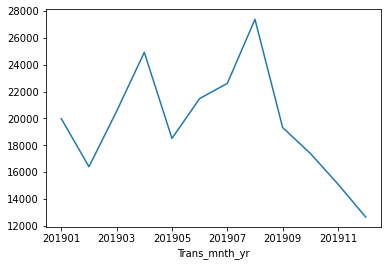

<Figure size 14400x3600 with 0 Axes>

In [505]:
# Quantity by month

data.groupby(by = ["Trans_mnth_yr"]).Quantity.sum().plot()
plt.figure(figsize = (200,50))

In [506]:
# Quantity by week

data["Trans_week"] = data.Transaction_Date.apply(lambda x: x.strftime("%W"))

data.groupby(by = ["Trans_week"]).Quantity.sum()

Trans_week
00    5704
01    4638
02    4311
03    3041
04    4226
05    3645
06    5224
07    3591
08    3618
09    4469
10    4030
11    5099
12    5344
13    8253
14    4706
15    6839
16    4612
17    4187
18    4841
19    4272
20    3520
21    3485
22    5787
23    7873
24    3215
25    3333
26    3889
27    4108
28    6648
29    5538
30    9449
31    5301
32    5194
33    6461
34    4548
35    4033
36    5652
37    3447
38    4473
39    3776
40    4123
41    4302
42    3878
43    3371
44    3527
45    2918
46    2789
47    4774
48    4209
49    4655
50    2352
51     856
52     233
Name: Quantity, dtype: int64

In [507]:
# Quantity by day

data["Trans_day"] = data.Transaction_Date.apply(lambda x: x.strftime("%A"))

data.groupby(by = ["Trans_day"]).Quantity.sum().sort_values()

Trans_day
Tuesday      11213
Monday       11919
Saturday     37811
Wednesday    39685
Sunday       39806
Thursday     44039
Friday       51894
Name: Quantity, dtype: int64

In [508]:
data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Total_Spend,Gender,Location,Tenure_Months,Invoice_amount,Trans_month,Trans_year,Trans_mnth_yr,Trans_week,Trans_day
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,6924.50,M,Chicago,12,158.6729,01,2019,201901,00,Tuesday
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,6924.50,M,Chicago,12,158.6729,01,2019,201901,00,Tuesday
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,...,6924.50,M,Chicago,12,276.5940,01,2019,201901,00,Tuesday
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,...,6924.50,M,Chicago,12,96.1500,01,2019,201901,00,Tuesday
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,...,6924.50,M,Chicago,12,175.5810,01,2019,201901,00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,...,6058.75,F,New York,45,112.4555,12,2019,201912,52,Tuesday
52520,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,...,6058.75,F,New York,45,112.4555,12,2019,201912,52,Tuesday
52521,14410,48492,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.50,Clicked,...,6058.75,F,New York,45,324.3665,12,2019,201912,52,Tuesday
52522,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,6058.75,F,California,7,449.3600,12,2019,201912,52,Tuesday


In [509]:
# Understand  the trends/ seasonality of sales by category

data.groupby(by = ["Trans_mnth_yr", "Product_Category"]).Invoice_amount.sum().reset_index()

,Trans_mnth_yr,Product_Category,Invoice_amount
0,201901,Accessories,63.22700
1,201901,Android,103.12760
2,201901,Apparel,59198.56210
3,201901,Bags,15655.28456
4,201901,Bottles,1097.45435
...,...,...,...
168,201912,Nest-Canada,5411.54060
169,201912,Nest-USA,290133.51300
170,201912,Notebooks & Journals,867.79000
171,201912,Office,21365.59620


In [510]:
data["Trans_day"] = data.Transaction_Date.apply(lambda x: x.strftime("%d"))

<AxesSubplot:>

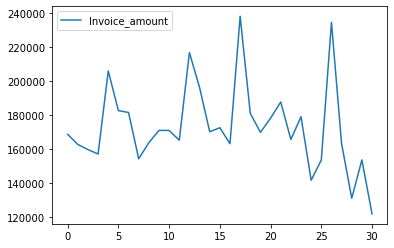

In [511]:
# How sales varies over days

data.groupby(by = ["Trans_day"]).Invoice_amount.sum().reset_index().plot()

<AxesSubplot:xlabel='Trans_day'>

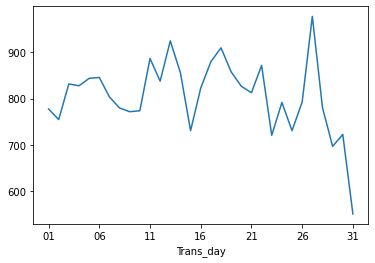

In [512]:
# How no. of orders varies over days

data.groupby(by = ["Trans_day"]).Transaction_ID.nunique().plot()

In [513]:
# Revenue , Marketing spend, tax, delivery charges by month

data.groupby(by = ["Trans_mnth_yr"]).Invoice_amount.sum()

Trans_mnth_yr
201901    490294.52415
201902    371596.15430
201903    409276.55804
201904    471473.78082
201905    360677.69836
201906    358295.09569
201907    447680.27304
201908    473335.48034
201909    395430.35814
201910    478869.02081
201911    547368.17026
201912    556112.29179
Name: Invoice_amount, dtype: float64

In [514]:
data.groupby(by = ["Trans_mnth_yr"]).Total_Spend.mean()

Trans_mnth_yr
201901    4934.949612
201902    4827.477994
201903    4019.339739
201904    5217.804824
201905    3832.716683
201906    4441.713501
201907    3927.758997
201908    4616.589082
201909    4490.550323
201910    4931.977380
201911    5326.367010
201912    6433.674369
Name: Total_Spend, dtype: float64

In [515]:
data.groupby(by = ["Trans_mnth_yr"]).GST.mean()

Trans_mnth_yr
201901    0.131688
201902    0.136105
201903    0.141690
201904    0.142479
201905    0.144976
201906    0.143229
201907    0.144806
201908    0.148549
201909    0.139209
201910    0.130065
201911    0.116442
201912    0.121919
Name: GST, dtype: float64

In [516]:
data.groupby(by = ["Trans_mnth_yr"]).Delivery_Charges.sum()

Trans_mnth_yr
201901    58401.75
201902    48454.28
201903    59324.29
201904    40929.78
201905    40745.99
201906    37055.84
201907    48024.13
201908    60595.00
201909    40762.06
201910    45826.81
201911    32287.93
201912    37881.99
Name: Delivery_Charges, dtype: float64

In [517]:
# Marketing spend impacting the revenue on monthly basis

monthly_rev = data.groupby(by = ["Trans_mnth_yr"])["Invoice_amount"].sum()
monthly_mark_spend = data.groupby(by = ["Trans_mnth_yr"])["Total_Spend"].mean()

In [518]:
pd.concat([monthly_rev,monthly_mark_spend], axis = 1)

,Invoice_amount,Total_Spend
Trans_mnth_yr,,
201901,490294.52415,4934.949612
201902,371596.15430,4827.477994
201903,409276.55804,4019.339739
201904,471473.78082,5217.804824
201905,360677.69836,3832.716683
201906,358295.09569,4441.713501
201907,447680.27304,3927.758997
201908,473335.48034,4616.589082
201909,395430.35814,4490.550323


<AxesSubplot:xlabel='Trans_mnth_yr'>

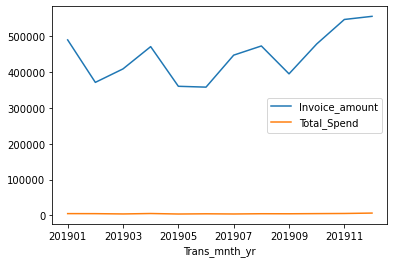

In [519]:
pd.concat([monthly_rev,monthly_mark_spend], axis = 1).plot()

<AxesSubplot:xlabel='Total_Spend', ylabel='Invoice_amount'>

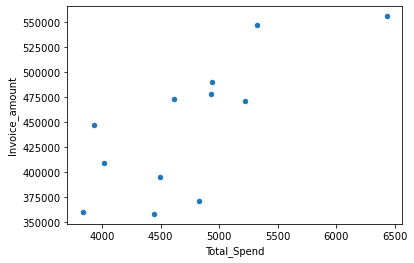

In [520]:
scatter = pd.concat([monthly_rev,monthly_mark_spend], axis = 1).reset_index().drop(columns = ["Trans_mnth_yr"])

scatter.plot(x = "Total_Spend", y = "Invoice_amount", kind = "scatter")

In [521]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Transaction_month    52524 non-null  int64         
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

In [522]:
# Product appeared in transactions

data.groupby(by = ["Transaction_ID", "Product_Category"]).Transaction_ID.count().sort_values()

Transaction_ID  Product_Category
16679           Nest-USA             1
36609           Apparel              1
36608           Office               1
                Lifestyle            1
                Housewares           1
                                    ..
37491           Apparel             21
34189           Apparel             21
39392           Apparel             22
38059           Apparel             27
32526           Apparel             35
Name: Transaction_ID, Length: 33801, dtype: int64

In [523]:
# Product purchased mostly based on the quantity

data.groupby(by = ["Product_Category"]).Quantity.sum().sort_values(ascending = False)

Product_Category
Office                  88383
Apparel                 32438
Drinkware               30501
Lifestyle               24881
Nest-USA                21430
Bags                    15273
Notebooks & Journals     9556
Headgear                 3533
Nest                     2837
Housewares               2484
Bottles                  2090
Waze                     1144
Accessories              1097
Nest-Canada               469
Gift Cards                206
Android                    45
Name: Quantity, dtype: int64

# Performing Customer Segmentation

### Heuristic (Value Based, RFM) - Divide the customers into Premium, Gold, Silver and Standard customers

In [524]:
# Value Based Segmentation

In [525]:
data.Invoice_amount.quantile(q= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1     11.38080
0.2     17.62064
0.3     22.52000
0.4     29.11620
0.5     45.63620
0.6     81.32820
0.7    124.71000
0.8    169.90000
0.9    253.54335
Name: Invoice_amount, dtype: float64

In [526]:
data["Seg"] = pd.qcut(x = data.Invoice_amount, q = 10, labels = False)
data["Seg"]

0        7
1        7
2        9
3        6
4        8
        ..
52519    6
52520    6
52521    9
52522    9
52523    9
Name: Seg, Length: 52524, dtype: int64

In [527]:
data[["Quantity", "Avg_Price", "Delivery_Charges", "Discount_pct", "GST", "Total_Spend", "Invoice_amount", "Seg"]].groupby(by = "Seg").mean().T

Seg,0,1,2,3,4,5,6,7,8,9
Quantity,1.179492,1.605771,1.491735,1.702404,2.912895,5.191188,5.028745,3.074388,6.645137,17.030268
Avg_Price,2.890430,6.373293,11.401041,14.373026,17.701818,29.951337,77.122979,116.993237,119.698579,128.546042
Delivery_Charges,6.129718,6.559027,6.793663,7.645857,9.998866,13.908391,12.810621,10.019293,12.583200,18.956318
Discount_pct,7.939727,8.310720,7.858636,5.494086,5.913653,7.509579,10.161812,4.358540,6.201995,4.218542
GST,0.139466,0.155110,0.164003,0.165189,0.166315,0.157500,0.118108,0.105620,0.101070,0.100897
Total_Spend,4699.614744,4607.486428,4522.752404,4680.443075,4702.043386,4657.149435,4840.181393,4701.840136,5032.508244,4900.316132
Invoice_amount,9.428829,14.614681,20.232731,25.617399,36.226034,61.381499,103.846810,146.905369,197.173525,417.221057


In [528]:
# Percentage break-up across all the segments

(data[["Invoice_amount", "Seg"]].groupby(by = "Seg").sum()/np.sum(data[["Invoice_amount", "Seg"]].groupby(by = "Seg").Invoice_amount.sum()))*100

,Invoice_amount
Seg,
0,0.928035
1,1.426731
2,1.986506
3,2.505152
4,3.568938
5,5.977369
6,10.176598
7,17.794472
8,14.750102


In [529]:
# RFM Segmentation

In [530]:
from datetime import datetime

In [531]:
# Recency

data["reference_date"] = "2019-12-31"
data.reference_date = data.reference_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
data["Days_diff"] = data.reference_date - data.Transaction_Date
df_r = data.groupby(by = ["CustomerID"]).Days_diff.min().reset_index()
df_r.Days_diff = df_r.Days_diff.dt.days # converting datetime to int data type format
df_r

,CustomerID,Days_diff
0,12346,107
1,12347,59
2,12348,73
3,12350,17
4,12356,107
...,...,...
1463,18259,270
1464,18260,87
1465,18269,194
1466,18277,69


In [532]:
# Frequency 

df_f = data.groupby(by = ["CustomerID"]).Transaction_ID.nunique().reset_index()
df_f

,CustomerID,Transaction_ID
0,12346,1
1,12347,31
2,12348,8
3,12350,11
4,12356,13
...,...,...
1463,18259,3
1464,18260,19
1465,18269,2
1466,18277,1


In [533]:
# Monetary

df_m = data.groupby(by = ["CustomerID"]).Invoice_amount.sum().reset_index()
df_m

,CustomerID,Invoice_amount
0,12346,174.98174
1,12347,15655.72596
2,12348,1689.55594
3,12350,1467.43528
4,12356,2007.42900
...,...,...
1463,18259,833.42980
1464,18260,2942.95972
1465,18269,166.90750
1466,18277,333.80000


In [534]:
df_rfm = pd.merge(left = df_r, right = df_f, how = "inner", on = "CustomerID").merge(df_m, on = "CustomerID")

df_rfm.rename(columns = {"Days_diff": "Recency", 
                         "Transaction_ID": "Frequency",
                         "Invoice_amount" : "Monetary"
                        }, inplace = True)

df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,107,1,174.98174
1,12347,59,31,15655.72596
2,12348,73,8,1689.55594
3,12350,17,11,1467.43528
4,12356,107,13,2007.42900
...,...,...,...,...
1463,18259,270,3,833.42980
1464,18260,87,19,2942.95972
1465,18269,194,2,166.90750
1466,18277,69,1,333.80000


In [535]:
df_rfm[["Recency", "Frequency", "Monetary"]].quantile(q = [0.33, 0.67])

,Recency,Frequency,Monetary
0.33,78.00,7.0,1082.474833
0.67,187.89,18.0,3480.393135


In [536]:
# Calculate recency, frequency, monetary segmentation

df_rfm["r_seg"] = np.where(df_rfm.Recency <= 78, "Active", np.where(df_rfm.Recency <= 188, "At_Risk", "Churn"))

df_rfm["f_seg"] = np.where(df_rfm.Frequency <= 7, 1, np.where(df_rfm.Frequency <= 18, 2, 3))

df_rfm["m_seg"] = np.where(df_rfm.Monetary <= 1082.5, 1, np.where(df_rfm.Monetary <= 3480.4, 2, 3))

df_rfm

,CustomerID,Recency,Frequency,Monetary,r_seg,f_seg,m_seg
0,12346,107,1,174.98174,At_Risk,1,1
1,12347,59,31,15655.72596,Active,3,3
2,12348,73,8,1689.55594,Active,2,2
3,12350,17,11,1467.43528,Active,2,2
4,12356,107,13,2007.42900,At_Risk,2,2
...,...,...,...,...,...,...,...
1463,18259,270,3,833.42980,Churn,1,1
1464,18260,87,19,2942.95972,At_Risk,3,2
1465,18269,194,2,166.90750,Churn,1,1
1466,18277,69,1,333.80000,Active,1,1


In [537]:
df_rfm["fm_seg"] = np.where(((df_rfm.m_seg == 3) & (df_rfm.f_seg == 3)), "Platinum",
                   np.where((((df_rfm.m_seg == 2) & (df_rfm.f_seg == 3)) | 
                            ((df_rfm.m_seg == 3) & (df_rfm.f_seg == 2))), 
                             "Gold", 
                   np.where(((df_rfm.m_seg == 1) & (df_rfm.f_seg == 3)) | 
                            ((df_rfm.m_seg == 3) & (df_rfm.f_seg == 1)) |
                            ((df_rfm.m_seg == 2) & (df_rfm.f_seg == 2)), 
                            "Silver",
                            "Standard")))

In [538]:
df_rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'r_seg', 'f_seg',
       'm_seg', 'fm_seg'],
      dtype='object')

In [539]:
df_rfm[[ 'Recency', 'Frequency', 'Monetary', 'r_seg','fm_seg']].groupby(['r_seg','fm_seg']).mean()

Recency  Frequency      Monetary
r_seg   fm_seg                                       
Active  Gold       35.777778  17.638889   4081.226539
        Platinum   34.828431  47.313725  10162.022942
        Silver     35.393443  12.057377   2346.061659
        Standard   36.338710   4.475806    791.541731
At_Risk Gold      129.794118  19.000000   3909.749654
        Platinum  123.625954  41.473282   8200.894299
        Silver    133.165217  12.313043   2142.042933
        Standard  134.404545   4.190909    620.490053
Churn   Gold      262.035714  18.035714   3515.265230
        Platinum  274.978495  33.365591   7087.688348
        Silver    257.703704  11.601852   2199.048994
        Standard  270.241107   3.845850    675.457505

In [540]:
df_rfm[[ 'Recency', 'Frequency', 'Monetary', 'r_seg','fm_seg']].groupby(['r_seg','fm_seg']).mean().T

r_seg           Active                                             At_Risk  \
fm_seg            Gold      Platinum       Silver    Standard         Gold   
Recency      35.777778     34.828431    35.393443   36.338710   129.794118   
Frequency    17.638889     47.313725    12.057377    4.475806    19.000000   
Monetary   4081.226539  10162.022942  2346.061659  791.541731  3909.749654   

r_seg                                                  Churn               \
fm_seg        Platinum       Silver    Standard         Gold     Platinum   
Recency     123.625954   133.165217  134.404545   262.035714   274.978495   
Frequency    41.473282    12.313043    4.190909    18.035714    33.365591   
Monetary   8200.894299  2142.042933  620.490053  3515.265230  7087.688348   

r_seg                               
fm_seg          Silver    Standard  
Recency     257.703704  270.241107  
Frequency    11.601852    3.845850  
Monetary   2199.048994  675.457505

The suggested stratergy would be to provide promotions and discounts for At_Risk customers which are at Platinum or Gold level. Also try to win back customers the churn customers for Platinum category

In [541]:
# Scientific Segmentation (using K-means clustering)

In [542]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   CustomerID           52524 non-null  int64          
 1   Transaction_ID       52524 non-null  int64          
 2   Transaction_Date     52524 non-null  datetime64[ns] 
 3   Product_SKU          52524 non-null  object         
 4   Product_Description  52524 non-null  object         
 5   Product_Category     52524 non-null  object         
 6   Quantity             52524 non-null  int64          
 7   Avg_Price            52524 non-null  float64        
 8   Delivery_Charges     52524 non-null  float64        
 9   Coupon_Status        52524 non-null  object         
 10  Transaction_month    52524 non-null  int64          
 11  Coupon_Code          52524 non-null  object         
 12  Discount_pct         52524 non-null  int64          
 13  GST             

In [543]:
data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Transaction_month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Total_Spend', 'Gender', 'Location',
       'Tenure_Months', 'Invoice_amount', 'Trans_month', 'Trans_year',
       'Trans_mnth_yr', 'Trans_week', 'Trans_day', 'Seg', 'reference_date',
       'Days_diff'],
      dtype='object')

In [544]:
# Drop the unwanted columns

df = data.drop(columns = ['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU','Product_Description', 'Transaction_month', 'Trans_month', 'Trans_year','Trans_mnth_yr', 'Trans_week', 'Trans_day', 'Seg', 'reference_date','Days_diff', "Coupon_Code"], axis = 1)

In [545]:
# Convert categorical to numerical data 

df = pd.get_dummies(data = df,columns = ["Product_Category"], drop_first = True)
df = pd.get_dummies(data = df,columns = ["Coupon_Status"], drop_first = True)
df = pd.get_dummies(data = df,columns = ["Gender"], drop_first = True)
df = pd.get_dummies(data = df,columns = ["Location"], drop_first = True)

In [546]:
# There are no missing values so no need to perform missing value imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Quantity                               52524 non-null  int64  
 1   Avg_Price                              52524 non-null  float64
 2   Delivery_Charges                       52524 non-null  float64
 3   Discount_pct                           52524 non-null  int64  
 4   GST                                    52524 non-null  float64
 5   Total_Spend                            52524 non-null  float64
 6   Tenure_Months                          52524 non-null  int64  
 7   Invoice_amount                         52524 non-null  float64
 8   Product_Category_Android               52524 non-null  uint8  
 9   Product_Category_Apparel               52524 non-null  uint8  
 10  Product_Category_Bags                  52524 non-null  uint8  
 11  Pr

In [547]:
# Applying outlier treatment

def outlier_val(x):
    if ((x.dtype == "int") or (x.dtype == "float")):
        x = x.clip(lower = x.quantile(0.01) , upper  = x.quantile(0.99))
    else:
        x
    
    return x

In [548]:
df = df.apply(outlier_val)

In [549]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [550]:
# Standardizing the data

ss = StandardScaler()
ss = ss.fit(df)

In [551]:
len(df.columns) # No. of columns

30

In [552]:
df_std = pd.DataFrame(ss.transform(df), columns = df.columns)
df_std

,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Total_Spend,Tenure_Months,Invoice_amount,Product_Category_Android,Product_Category_Apparel,...,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze,Coupon_Status_Not Used,Coupon_Status_Used,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,-0.173621,1.664114,-0.295476,0.307465,-0.816167,1.550673,-1.049507,0.552593,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.517560,-0.233198
1,-0.173621,1.664114,-0.295476,0.307465,-0.816167,1.550673,-1.049507,0.552593,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.517560,-0.233198
2,-0.124018,1.159163,-0.295476,-0.639375,-0.816167,1.550673,-1.049507,1.608488,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,2.354619,-0.715301,1.287828,1.370987,-0.304992,-0.517560,-0.233198
3,-0.173621,0.485622,-0.295476,-0.639375,-0.816167,1.550673,-1.049507,-0.007252,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,1.287828,1.370987,-0.304992,-0.517560,-0.233198
4,-0.173621,1.664114,-0.295476,-0.639375,-0.816167,1.550673,-1.049507,0.703993,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,1.287828,1.370987,-0.304992,-0.517560,-0.233198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,-0.173621,0.802400,-0.295476,-0.639375,-1.906328,0.939318,1.399769,0.138751,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,1.932142,-0.233198
52520,-0.173621,0.802400,-0.295476,-0.639375,-1.906328,0.939318,1.399769,0.138751,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,1.932142,-0.233198
52521,-0.074414,0.802400,-0.295476,-0.639375,-1.906328,0.939318,1.399769,2.036255,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,1.932142,-0.233198
52522,0.024793,0.469628,-0.295476,-0.639375,-0.816167,0.939318,-1.420609,3.155477,-0.028624,-0.725913,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,-0.517560,-0.233198


In [553]:
# Principal Component Analysis
# No. of components = No. of features = 30

pc = PCA(n_components = 30)
pc = pc.fit(df_std)

In [554]:
pc.explained_variance_

array([3.32445611e+00, 2.05816715e+00, 1.71213415e+00, 1.40771728e+00,
       1.36053652e+00, 1.18312903e+00, 1.16016241e+00, 1.13213769e+00,
       1.12431115e+00, 1.06888676e+00, 1.06485623e+00, 1.04300270e+00,
       1.02102564e+00, 1.01400058e+00, 1.00732126e+00, 1.00583179e+00,
       1.00372406e+00, 1.00203217e+00, 9.83688373e-01, 9.69575295e-01,
       9.50764500e-01, 8.91901731e-01, 8.42429097e-01, 7.87705554e-01,
       4.01075432e-01, 2.68246037e-01, 1.04924608e-01, 9.98826667e-02,
       6.94520044e-03, 6.55633364e-31])

In [555]:
pc.explained_variance_ratio_

array([1.10813094e-01, 6.86042656e-02, 5.70700519e-02, 4.69230159e-02,
       4.53503538e-02, 3.94368836e-02, 3.86713441e-02, 3.77372045e-02,
       3.74763249e-02, 3.56288802e-02, 3.54945319e-02, 3.47660949e-02,
       3.40335399e-02, 3.37993758e-02, 3.35767360e-02, 3.35270881e-02,
       3.34568317e-02, 3.34004363e-02, 3.27889882e-02, 3.23185612e-02,
       3.16915466e-02, 2.97294917e-02, 2.80804353e-02, 2.62563519e-02,
       1.33689265e-02, 8.94136431e-03, 3.49742036e-03, 3.32935883e-03,
       2.31502274e-04, 2.18540294e-32])

In [556]:
# 17 components contribute to 75% of the variance.

np.cumsum(pc.explained_variance_ratio_)*100

array([ 11.08130938,  17.94173594,  23.64874113,  28.34104272,
        32.8760781 ,  36.81976646,  40.68690087,  44.46062133,
        48.20825382,  51.77114183,  55.32059502,  58.79720451,
        62.2005585 ,  65.58049608,  68.93816968,  72.29087849,
        75.63656166,  78.97660529,  82.2555041 ,  85.48736022,
        88.65651488,  91.62946405,  94.43750758,  97.06314277,
        98.40003542,  99.29417185,  99.64391389,  99.97684977,
       100.        , 100.        ])

In [557]:
# Re-applying the PCA

pc = PCA(n_components = 17)
pc = pc.fit(df_std)

pcs = pc.transform(df_std)

In [558]:
pcs = pd.DataFrame(pcs, columns = ['PCA_'+str(i) for i in range(1,18)])
pcs

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17
0,2.435947,1.407141,-0.782896,1.378780,-0.490054,-0.626570,-0.081723,-0.385436,-0.008284,-0.211629,0.140655,-0.326202,0.090678,-0.399143,0.102110,-0.029207,-0.174237
1,2.435947,1.407141,-0.782896,1.378780,-0.490054,-0.626570,-0.081723,-0.385436,-0.008284,-0.211629,0.140655,-0.326202,0.090678,-0.399143,0.102110,-0.029207,-0.174237
2,2.749726,-1.674081,-0.611437,1.448848,-0.348980,-0.547646,-0.123279,-0.420293,0.021373,-0.267650,0.175878,-0.390687,0.020252,-0.470027,0.090773,-0.041016,-0.157124
3,1.725608,-0.609409,-0.485335,1.152056,-0.861997,-0.759188,-0.032784,-0.356817,-0.095699,-0.231422,0.139906,-0.332215,0.042061,-0.437819,0.091627,-0.011386,-0.201889
4,2.587532,-0.612512,-0.778220,1.327788,-0.543173,-0.620605,-0.091640,-0.412527,-0.007713,-0.201845,0.173573,-0.329229,0.078786,-0.393737,0.087485,-0.002504,-0.198638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,2.563611,-0.456351,0.023641,-1.915340,-0.540681,3.322213,-1.786865,-0.225579,-2.411390,-0.173868,0.380664,0.131856,-0.382766,-0.539005,-0.002850,-0.038564,0.322803
52520,2.563611,-0.456351,0.023641,-1.915340,-0.540681,3.322213,-1.786865,-0.225579,-2.411390,-0.173868,0.380664,0.131856,-0.382766,-0.539005,-0.002850,-0.038564,0.322803
52521,3.341559,-0.562375,0.122571,-1.579490,0.156043,3.529929,-1.850639,-0.354864,-2.135303,-0.124582,0.397388,0.099629,-0.413570,-0.509603,-0.008372,0.010982,0.339808
52522,2.961108,-0.799718,-0.335264,0.189979,1.111360,-0.455757,-0.514197,0.350341,0.807209,-0.048753,0.187751,-0.393797,0.162013,-0.188757,0.248854,0.179479,-0.256019


In [559]:
Load = pd.DataFrame((pc.components_.T*np.sqrt(pc.explained_variance_)).T, columns = df_std.columns).T
Load

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Quantity,0.030797,-0.022723,0.532662,0.180008,0.413035,0.154804,-0.004769,-0.042811,0.188217,-0.028920,0.078921,-0.041059,-0.065985,0.004787,0.055527,0.088948,0.031970
Avg_Price,0.883351,0.043885,-0.349556,0.055863,0.070111,0.060932,-0.032095,-0.007896,-0.008007,0.008828,0.026480,0.011761,0.039306,0.028401,-0.000013,-0.005439,-0.001645
Delivery_Charges,-0.074945,-0.032540,0.474386,0.195418,0.398903,0.157950,-0.047330,-0.120486,0.142407,0.126564,-0.048749,-0.055311,0.004613,-0.021377,-0.034597,-0.032499,-0.013832
Discount_pct,-0.050658,0.937671,-0.004508,0.033059,0.033122,0.016604,-0.002747,0.008118,0.000575,-0.007932,-0.009765,0.001202,-0.001495,-0.004808,0.002764,-0.007691,0.014373
GST,-0.842137,-0.065429,-0.345060,0.201679,0.332447,-0.017855,-0.020066,0.017626,-0.019305,-0.047768,0.051448,0.005853,0.009615,0.000555,-0.004972,0.007055,0.002619
Total_Spend,0.132896,0.015085,-0.050776,0.057621,-0.051477,0.372154,-0.176130,0.100097,-0.249034,-0.233430,0.112941,-0.105765,-0.133230,-0.135278,-0.002584,0.011266,-0.015983
Tenure_Months,0.002548,0.009316,-0.000400,0.104642,-0.067358,0.167480,0.243454,-0.035450,-0.167878,-0.254699,0.004654,0.049095,-0.387510,-0.013253,-0.167998,-0.042859,0.180816
Invoice_amount,0.745919,-0.078973,0.040371,0.200589,0.406691,0.110976,-0.035952,-0.070258,0.144439,0.028366,0.004969,-0.015199,-0.012954,0.015353,-0.005824,0.021537,0.007306
Product_Category_Android,-0.003311,-0.012133,0.019060,-0.012912,-0.065586,-0.038098,0.018602,0.026578,-0.037351,0.029148,-0.051561,0.055225,-0.048066,0.009365,-0.239311,-0.237258,0.543317
Product_Category_Apparel,-0.635603,-0.038309,-0.474684,-0.032826,-0.034491,0.347402,-0.043672,-0.215849,0.392701,0.036180,-0.005624,-0.089846,-0.051007,0.003842,0.011127,0.014399,-0.001806


In [560]:
Load.columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17' ]
Load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Quantity,0.030797,-0.022723,0.532662,0.180008,0.413035,0.154804,-0.004769,-0.042811,0.188217,-0.028920,0.078921,-0.041059,-0.065985,0.004787,0.055527,0.088948,0.031970
Avg_Price,0.883351,0.043885,-0.349556,0.055863,0.070111,0.060932,-0.032095,-0.007896,-0.008007,0.008828,0.026480,0.011761,0.039306,0.028401,-0.000013,-0.005439,-0.001645
Delivery_Charges,-0.074945,-0.032540,0.474386,0.195418,0.398903,0.157950,-0.047330,-0.120486,0.142407,0.126564,-0.048749,-0.055311,0.004613,-0.021377,-0.034597,-0.032499,-0.013832
Discount_pct,-0.050658,0.937671,-0.004508,0.033059,0.033122,0.016604,-0.002747,0.008118,0.000575,-0.007932,-0.009765,0.001202,-0.001495,-0.004808,0.002764,-0.007691,0.014373
GST,-0.842137,-0.065429,-0.345060,0.201679,0.332447,-0.017855,-0.020066,0.017626,-0.019305,-0.047768,0.051448,0.005853,0.009615,0.000555,-0.004972,0.007055,0.002619
Total_Spend,0.132896,0.015085,-0.050776,0.057621,-0.051477,0.372154,-0.176130,0.100097,-0.249034,-0.233430,0.112941,-0.105765,-0.133230,-0.135278,-0.002584,0.011266,-0.015983
Tenure_Months,0.002548,0.009316,-0.000400,0.104642,-0.067358,0.167480,0.243454,-0.035450,-0.167878,-0.254699,0.004654,0.049095,-0.387510,-0.013253,-0.167998,-0.042859,0.180816
Invoice_amount,0.745919,-0.078973,0.040371,0.200589,0.406691,0.110976,-0.035952,-0.070258,0.144439,0.028366,0.004969,-0.015199,-0.012954,0.015353,-0.005824,0.021537,0.007306
Product_Category_Android,-0.003311,-0.012133,0.019060,-0.012912,-0.065586,-0.038098,0.018602,0.026578,-0.037351,0.029148,-0.051561,0.055225,-0.048066,0.009365,-0.239311,-0.237258,0.543317
Product_Category_Apparel,-0.635603,-0.038309,-0.474684,-0.032826,-0.034491,0.347402,-0.043672,-0.215849,0.392701,0.036180,-0.005624,-0.089846,-0.051007,0.003842,0.011127,0.014399,-0.001806


In [561]:
Load.to_csv("load.csv") # Exporting the data 

PermissionError: [Errno 13] Permission denied: 'load.csv'

In [565]:
Load.T.columns

Index(['Quantity', 'Avg_Price', 'Delivery_Charges', 'Discount_pct', 'GST',
       'Total_Spend', 'Tenure_Months', 'Invoice_amount',
       'Product_Category_Android', 'Product_Category_Apparel',
       'Product_Category_Bags', 'Product_Category_Bottles',
       'Product_Category_Drinkware', 'Product_Category_Gift Cards',
       'Product_Category_Headgear', 'Product_Category_Housewares',
       'Product_Category_Lifestyle', 'Product_Category_Nest',
       'Product_Category_Nest-Canada', 'Product_Category_Nest-USA',
       'Product_Category_Notebooks & Journals', 'Product_Category_Office',
       'Product_Category_Waze', 'Coupon_Status_Not Used', 'Coupon_Status_Used',
       'Gender_M', 'Location_Chicago', 'Location_New Jersey',
       'Location_New York', 'Location_Washington DC'],
      dtype='object')

In [566]:
#final_list = ["Avg_Price", "Coupon_Status_Used", "Product_Category_Office", "Location_Chicago", "Product_Category_Nest", "GST", "Location_New Jersey", "Product_Category_Drinkware", "Product_Category_Notebooks & Journals", "Product_Category_Bags", "Product_Category_Waze", "Product_Category_Nest-Canada", "Product_Category_Android", "Location_Washington DC"]

final_list = ['Quantity', 'Avg_Price', 'Delivery_Charges', 'GST',
       'Product_Category_Apparel', 'Product_Category_Drinkware','Product_Category_Nest-USA',
       'Product_Category_Office', 'Location_Chicago',
       'Location_New Jersey', 'Location_New York','Invoice_amount']

In [567]:
final_list

['Quantity',
 'Avg_Price',
 'Delivery_Charges',
 'GST',
 'Product_Category_Apparel',
 'Product_Category_Drinkware',
 'Product_Category_Nest-USA',
 'Product_Category_Office',
 'Location_Chicago',
 'Location_New Jersey',
 'Location_New York',
 'Invoice_amount']

In [568]:
# Overall 12 features have been identified based on factor loading method

In [569]:
seg_input = df_std[final_list]
seg_input

,Quantity,Avg_Price,Delivery_Charges,GST,Product_Category_Apparel,Product_Category_Drinkware,Product_Category_Nest-USA,Product_Category_Office,Location_Chicago,Location_New Jersey,Location_New York,Invoice_amount
0,-0.173621,1.664114,-0.295476,-0.816167,-0.725913,-0.2665,1.657780,-0.376235,1.370987,-0.304992,-0.517560,0.552593
1,-0.173621,1.664114,-0.295476,-0.816167,-0.725913,-0.2665,1.657780,-0.376235,1.370987,-0.304992,-0.517560,0.552593
2,-0.124018,1.159163,-0.295476,-0.816167,-0.725913,-0.2665,1.657780,-0.376235,1.370987,-0.304992,-0.517560,1.608488
3,-0.173621,0.485622,-0.295476,-0.816167,-0.725913,-0.2665,1.657780,-0.376235,1.370987,-0.304992,-0.517560,-0.007252
4,-0.173621,1.664114,-0.295476,-0.816167,-0.725913,-0.2665,1.657780,-0.376235,1.370987,-0.304992,-0.517560,0.703993
...,...,...,...,...,...,...,...,...,...,...,...,...
52519,-0.173621,0.802400,-0.295476,-1.906328,-0.725913,-0.2665,-0.603216,-0.376235,-0.729402,-0.304992,1.932142,0.138751
52520,-0.173621,0.802400,-0.295476,-1.906328,-0.725913,-0.2665,-0.603216,-0.376235,-0.729402,-0.304992,1.932142,0.138751
52521,-0.074414,0.802400,-0.295476,-1.906328,-0.725913,-0.2665,-0.603216,-0.376235,-0.729402,-0.304992,1.932142,2.036255
52522,0.024793,0.469628,-0.295476,-0.816167,-0.725913,-0.2665,1.657780,-0.376235,-0.729402,-0.304992,-0.517560,3.155477


In [570]:
# Applying silhoute score

In [571]:
from sklearn.metrics import silhouette_score

In [572]:
for k in range(3,10):
    km = KMeans(n_clusters=k, random_state=123).fit(seg_input)
    print('-------------------------------------')
    print('k=', k, 'value')
    print('sc_score', silhouette_score(seg_input,km.labels_ ))
    print('inertia', km.inertia_)
    print('segment_distribution', list(pd.Series(km.labels_).value_counts()*100/sum(pd.Series(km.labels_).value_counts())))

-------------------------------------
k= 3 value
sc_score 0.3500011235785114
inertia 407171.9554098936
segment_distribution [52.149493564846544, 31.80450841520067, 16.045998019952783]
-------------------------------------
k= 4 value
sc_score 0.3884734517998178
inertia 349636.3075501776
segment_distribution [45.44779529358008, 31.84258624628741, 16.078364176376514, 6.631254283755998]
-------------------------------------
k= 5 value
sc_score 0.34011745122116066
inertia 320757.4007945092
segment_distribution [35.854085751275605, 31.865432944939457, 15.147361206305689, 10.501865813723251, 6.631254283755998]
-------------------------------------
k= 6 value
sc_score 0.4099645745067503
inertia 279829.1815957903
segment_distribution [39.73802452212322, 29.003883938770848, 13.881273322671541, 7.792628131901607, 6.320919960399055, 3.2632701241337294]
-------------------------------------
k= 7 value
sc_score 0.37681319701060134
inertia 256058.25339849468
segment_distribution [33.879750209428074, 

In [573]:
# Performing the profiling that assists in identifying the characteristics of the segments which helps to define the segments

In [574]:
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_input)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_input)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_input)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_input)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_input)
km_8 = KMeans(n_clusters=8, random_state=123).fit(seg_input)

In [575]:
seg_input['km_3'] = km_3.labels_
seg_input['km_4'] = km_4.labels_
seg_input['km_5'] = km_5.labels_
seg_input['km_6'] = km_6.labels_
seg_input['km_7'] = km_7.labels_
seg_input['km_8'] = km_8.labels_

<ipython-input-575-e8a3e6f0c288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_input['km_3'] = km_3.labels_
<ipython-input-575-e8a3e6f0c288>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_input['km_4'] = km_4.labels_
<ipython-input-575-e8a3e6f0c288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [576]:
seg_input.head()

,Quantity,Avg_Price,Delivery_Charges,GST,Product_Category_Apparel,Product_Category_Drinkware,Product_Category_Nest-USA,Product_Category_Office,Location_Chicago,Location_New Jersey,Location_New York,Invoice_amount,km_3,km_4,km_5,km_6,km_7,km_8
0,-0.173621,1.664114,-0.295476,-0.816167,-0.725913,-0.2665,1.65778,-0.376235,1.370987,-0.304992,-0.51756,0.552593,1,3,3,2,0,5
1,-0.173621,1.664114,-0.295476,-0.816167,-0.725913,-0.2665,1.65778,-0.376235,1.370987,-0.304992,-0.51756,0.552593,1,3,3,2,0,5
2,-0.124018,1.159163,-0.295476,-0.816167,-0.725913,-0.2665,1.65778,-0.376235,1.370987,-0.304992,-0.51756,1.608488,1,3,3,2,0,5
3,-0.173621,0.485622,-0.295476,-0.816167,-0.725913,-0.2665,1.65778,-0.376235,1.370987,-0.304992,-0.51756,-0.007252,1,3,3,2,0,5
4,-0.173621,1.664114,-0.295476,-0.816167,-0.725913,-0.2665,1.65778,-0.376235,1.370987,-0.304992,-0.51756,0.703993,1,3,3,2,0,5


In [577]:
seg_input.km_3.count()

52524

In [578]:
seg_dist = pd.concat([pd.Series(seg_input.km_3.count()/seg_input.km_3.count()),
pd.Series(seg_input.km_3.value_counts().sort_index()/sum(seg_input.km_3.value_counts().sort_index())),
pd.Series(seg_input.km_4.value_counts().sort_index()/sum(seg_input.km_3.value_counts().sort_index())),
pd.Series(seg_input.km_5.value_counts().sort_index()/sum(seg_input.km_3.value_counts().sort_index())),
pd.Series(seg_input.km_6.value_counts().sort_index()/sum(seg_input.km_3.value_counts().sort_index())),
pd.Series(seg_input.km_7.value_counts().sort_index()/sum(seg_input.km_3.value_counts().sort_index())),
pd.Series(seg_input.km_8.value_counts().sort_index()/sum(seg_input.km_3.value_counts().sort_index()))],axis=0)

In [579]:
pd.DataFrame(seg_dist).T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
0,1.0,0.521495,0.318045,0.16046,0.066313,0.160784,0.454478,0.318426,0.066313,0.151474,...,0.00297,0.079011,0.30765,0.067131,0.114538,0.06319,0.101668,0.24585,0.030919,0.069054


In [580]:
profile1 = pd.concat([
    seg_input.mean(),
    seg_input.groupby('km_3').mean().T,
    seg_input.groupby('km_4').mean().T,
    seg_input.groupby('km_5').mean().T,
    seg_input.groupby('km_6').mean().T,
    seg_input.groupby('km_7').mean().T,
    seg_input.groupby('km_8').mean().T],axis=1)

In [581]:
profile1

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Quantity,-3.104692e-15,-0.056207,-0.138437,0.457066,0.211160,0.442251,-0.091751,-0.136329,0.211160,0.459131,...,13.956751,-0.075215,-0.106269,-0.137720,0.185164,0.110161,-0.105486,-0.137701,2.141166,-0.113761
Avg_Price,-3.557514e-15,-0.567151,1.307837,-0.749003,-0.669909,-0.749051,-0.552457,1.306232,-0.669909,-0.757200,...,-0.770531,0.066020,-0.550665,1.273706,-0.783751,-0.669945,-0.559116,1.138187,-0.642945,0.186965
Delivery_Charges,-2.029986e-14,0.038876,-0.227063,0.323711,0.304697,0.325850,-0.001945,-0.225210,0.304697,0.338171,...,1.955883,-0.084010,-0.154745,-0.232336,0.003664,0.073073,-0.127653,-0.223273,4.439492,-0.162605
GST,1.714344e-15,0.907059,-0.960652,-1.043849,0.928089,-1.043210,0.905017,-0.958224,0.928089,-0.998957,...,-0.399670,-0.033459,0.901400,-0.960059,-0.816167,0.928089,0.717937,-1.048484,0.075831,0.063776
Product_Category_Apparel,8.233300e-15,0.665995,-0.725913,-0.725663,-0.725913,-0.725664,0.871244,-0.725913,-0.725913,-0.725648,...,-0.631525,0.098756,0.873020,-0.725913,-0.725913,-0.725913,0.785527,-0.725913,-0.207812,0.205492
Product_Category_Drinkware,-9.754591e-16,0.242917,-0.266500,-0.261255,3.752346,-0.266500,-0.266500,-0.266500,3.752346,-0.266500,...,0.119928,-0.266500,-0.266500,-0.266500,-0.266500,3.752346,-0.266500,-0.266500,0.139344,-0.266500
Product_Category_Nest-USA,-1.656955e-14,-0.603216,1.293422,-0.603216,-0.603216,-0.603216,-0.603216,1.291154,-0.603216,-0.603216,...,-0.603216,0.052200,-0.603216,1.301253,-0.603216,-0.603216,-0.603216,1.117438,-0.583725,0.146085
Product_Category_Office,-1.379483e-14,-0.376235,-0.376235,1.968495,-0.376235,1.963775,-0.376235,-0.376235,-0.376235,2.107599,...,1.354784,-0.014331,-0.376235,-0.376235,2.657910,-0.376235,-0.376235,-0.376235,0.529898,-0.366197
Location_Chicago,1.651575e-14,0.001912,-0.004293,0.002295,0.025605,0.001320,-0.001028,-0.004532,0.025605,0.040424,...,-0.015808,-0.729402,0.307989,-0.729402,0.006223,0.018613,-0.729402,0.302982,0.076351,-0.729402
Location_New Jersey,9.563382e-15,0.004961,0.003076,-0.022220,-0.012776,-0.023214,0.007729,0.003351,-0.012776,-0.008598,...,0.154464,3.278770,-0.304992,-0.304992,-0.026202,-0.012374,-0.304992,-0.304992,-0.075490,3.278770


In [582]:
profile2 = pd.concat([pd.DataFrame(seg_dist).T, profile1],axis=0)
profile2.columns = ['overall',
                   'KM3_1', 'KM3_2', 'KM3_3',
                   'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                   'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                   'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5', 'KM6_6',
                   'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5', 'KM7_6', 'KM7_7',
                   'KM8_1', 'KM8_2',  'KM8_3', 'KM8_4',  'KM8_5', 'KM8_6',  'KM8_7', 'KM8_8']

In [583]:
profile2

,overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
0,1.000000e+00,0.521495,0.318045,0.160460,0.066313,0.160784,0.454478,0.318426,0.066313,0.151474,...,0.002970,0.079011,0.307650,0.067131,0.114538,0.063190,0.101668,0.245850,0.030919,0.069054
Quantity,-3.104692e-15,-0.056207,-0.138437,0.457066,0.211160,0.442251,-0.091751,-0.136329,0.211160,0.459131,...,13.956751,-0.075215,-0.106269,-0.137720,0.185164,0.110161,-0.105486,-0.137701,2.141166,-0.113761
Avg_Price,-3.557514e-15,-0.567151,1.307837,-0.749003,-0.669909,-0.749051,-0.552457,1.306232,-0.669909,-0.757200,...,-0.770531,0.066020,-0.550665,1.273706,-0.783751,-0.669945,-0.559116,1.138187,-0.642945,0.186965
Delivery_Charges,-2.029986e-14,0.038876,-0.227063,0.323711,0.304697,0.325850,-0.001945,-0.225210,0.304697,0.338171,...,1.955883,-0.084010,-0.154745,-0.232336,0.003664,0.073073,-0.127653,-0.223273,4.439492,-0.162605
GST,1.714344e-15,0.907059,-0.960652,-1.043849,0.928089,-1.043210,0.905017,-0.958224,0.928089,-0.998957,...,-0.399670,-0.033459,0.901400,-0.960059,-0.816167,0.928089,0.717937,-1.048484,0.075831,0.063776
Product_Category_Apparel,8.233300e-15,0.665995,-0.725913,-0.725663,-0.725913,-0.725664,0.871244,-0.725913,-0.725913,-0.725648,...,-0.631525,0.098756,0.873020,-0.725913,-0.725913,-0.725913,0.785527,-0.725913,-0.207812,0.205492
Product_Category_Drinkware,-9.754591e-16,0.242917,-0.266500,-0.261255,3.752346,-0.266500,-0.266500,-0.266500,3.752346,-0.266500,...,0.119928,-0.266500,-0.266500,-0.266500,-0.266500,3.752346,-0.266500,-0.266500,0.139344,-0.266500
Product_Category_Nest-USA,-1.656955e-14,-0.603216,1.293422,-0.603216,-0.603216,-0.603216,-0.603216,1.291154,-0.603216,-0.603216,...,-0.603216,0.052200,-0.603216,1.301253,-0.603216,-0.603216,-0.603216,1.117438,-0.583725,0.146085
Product_Category_Office,-1.379483e-14,-0.376235,-0.376235,1.968495,-0.376235,1.963775,-0.376235,-0.376235,-0.376235,2.107599,...,1.354784,-0.014331,-0.376235,-0.376235,2.657910,-0.376235,-0.376235,-0.376235,0.529898,-0.366197
Location_Chicago,1.651575e-14,0.001912,-0.004293,0.002295,0.025605,0.001320,-0.001028,-0.004532,0.025605,0.040424,...,-0.015808,-0.729402,0.307989,-0.729402,0.006223,0.018613,-0.729402,0.302982,0.076351,-0.729402


In [ ]:
profile2.to_csv('profile_output.csv')

In [584]:
# Predicting customer lifetime value
##1.Define the low, medium and high value using customer revenue

In [585]:
# Monetary

In [586]:
df_Monetary = df_rfm[["CustomerID", "Monetary"]]

In [587]:
kmeans = KMeans(n_clusters=6)

In [588]:
kmeans.fit(df_Monetary[['Monetary']])

KMeans(n_clusters=6)

In [589]:
df_Monetary['revenue_cluster'] = kmeans.predict(df_Monetary[['Monetary']])
df_Monetary.head(3)

<ipython-input-589-02bf5f3025bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Monetary['revenue_cluster'] = kmeans.predict(df_Monetary[['Monetary']])


,CustomerID,Monetary,revenue_cluster
0,12346,174.98174,0
1,12347,15655.72596,1
2,12348,1689.55594,0


In [590]:
df_Monetary.groupby('revenue_cluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,790.0,929.662794,659.154627,6.99000,335.541660,877.90654,1437.145225,2267.53914
1,76.0,13513.525978,2638.196477,10536.61732,11551.795117,12691.20547,14722.749547,19989.91866
2,5.0,69888.130020,14511.780485,55308.01662,57962.371510,65743.77627,84634.522660,85791.96304
3,394.0,3617.759424,910.997835,2288.43920,2785.711550,3510.12361,4290.410093,5551.60012
4,15.0,27085.393163,5886.733155,20851.42164,23654.642770,23840.25045,30172.232525,40342.12404
5,188.0,7541.643955,1311.440426,5583.29998,6423.609045,7414.50535,8524.797115,10399.12571


In [591]:
#function for ordering cluster numbers in descending order


def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

In [592]:
df_Monetary = order_cluster('revenue_cluster', 'Monetary',df_Monetary,True)
df_Monetary.head()

,CustomerID,Monetary,revenue_cluster
0,12346,174.98174,0
1,12348,1689.55594,0
2,12350,1467.43528,0
3,12356,2007.42900,0
4,12359,784.03320,0


In [593]:
df_Monetary.groupby('revenue_cluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,790.0,929.662794,659.154627,6.99000,335.541660,877.90654,1437.145225,2267.53914
1,394.0,3617.759424,910.997835,2288.43920,2785.711550,3510.12361,4290.410093,5551.60012
2,188.0,7541.643955,1311.440426,5583.29998,6423.609045,7414.50535,8524.797115,10399.12571
3,76.0,13513.525978,2638.196477,10536.61732,11551.795117,12691.20547,14722.749547,19989.91866
4,15.0,27085.393163,5886.733155,20851.42164,23654.642770,23840.25045,30172.232525,40342.12404
5,5.0,69888.130020,14511.780485,55308.01662,57962.371510,65743.77627,84634.522660,85791.96304


In [594]:
df_Monetary

,CustomerID,Monetary,revenue_cluster
0,12346,174.98174,0
1,12348,1689.55594,0
2,12350,1467.43528,0
3,12356,2007.42900,0
4,12359,784.03320,0
...,...,...,...
1463,12748,84634.52266,5
1464,14606,65743.77627,5
1465,14911,57962.37151,5
1466,15311,85791.96304,5


In [595]:
# Recency

In [596]:
df_recency = df_rfm[["CustomerID", "Recency"]]

C:\Users\saach\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


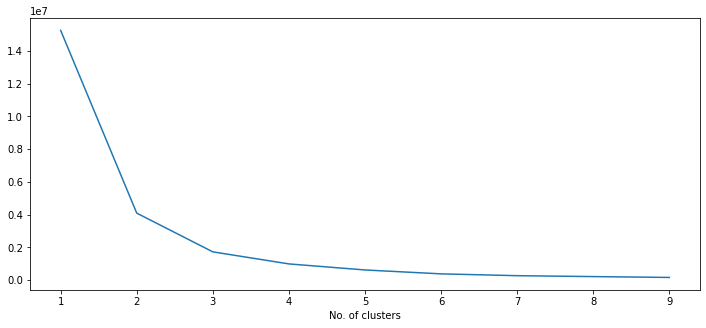

In [597]:
sse={}
customer_recency = df_recency[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(customer_recency)
    customer_recency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(12,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('No. of clusters')
plt.show()

In [598]:
sse

{1: 15243807.631471384,
 2: 4095305.8084076205,
 3: 1732135.7830895407,
 4: 997006.1439612795,
 5: 627857.5509696001,
 6: 390017.787064071,
 7: 279032.83754861046,
 8: 223979.96084072278,
 9: 171445.8808321448}

In [599]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_recency[['Recency']])
df_recency['Recency_cluster'] = kmeans.predict(df_recency[['Recency']])

<ipython-input-599-283ccde6e9bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['Recency_cluster'] = kmeans.predict(df_recency[['Recency']])


In [600]:
# function for ordering cluster numbers in descending order

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

In [601]:
df_recency = order_cluster('Recency_cluster', 'Recency',df_recency,False)

In [602]:
df_recency.head()

,CustomerID,Recency,Recency_cluster
0,12346,107,3
1,12348,73,3
2,12356,107,3
3,12359,130,3
4,12383,99,3


In [603]:
df_recency.groupby('Recency_cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,149.0,334.456376,19.787890,295.0,320.0,336.0,349.0,364.0
1,226.0,255.150442,22.326555,216.0,235.0,257.0,270.0,293.0
2,311.0,175.935691,22.349476,140.0,156.0,172.0,195.0,215.0
3,350.0,103.777143,21.195002,68.0,87.0,104.0,123.0,139.0
4,432.0,30.752315,18.117335,0.0,17.0,27.0,44.0,66.0


In [604]:
# Frequency

In [605]:
df_frequency = df_rfm[["CustomerID", "Frequency"]]

df_frequency

,CustomerID,Frequency
0,12346,1
1,12347,31
2,12348,8
3,12350,11
4,12356,13
...,...,...
1463,18259,3
1464,18260,19
1465,18269,2
1466,18277,1


In [606]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_frequency[['Frequency']])
df_frequency['frequency_cluster'] = kmeans.predict(df_frequency[['Frequency']])

df_frequency.groupby('frequency_cluster')['Frequency'].describe()

<ipython-input-606-5c3243158b4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['frequency_cluster'] = kmeans.predict(df_frequency[['Frequency']])


,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,937.0,6.834578,4.397377,1.0,3.00,6.0,10.00,16.0
1,5.0,288.200000,24.772969,261.0,274.00,288.0,291.00,327.0
2,113.0,55.486726,11.629024,41.0,46.00,53.0,64.00,85.0
3,395.0,26.194937,6.778210,17.0,20.00,25.0,31.50,40.0
4,18.0,116.777778,27.186838,87.0,95.75,110.0,123.75,176.0


In [607]:
#function for ordering cluster numbers in descending orders

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final



In [608]:
df_frequency = order_cluster('frequency_cluster', 'Frequency',df_frequency,True)

In [609]:
df_frequency.groupby('frequency_cluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,937.0,6.834578,4.397377,1.0,3.00,6.0,10.00,16.0
1,395.0,26.194937,6.778210,17.0,20.00,25.0,31.50,40.0
2,113.0,55.486726,11.629024,41.0,46.00,53.0,64.00,85.0
3,18.0,116.777778,27.186838,87.0,95.75,110.0,123.75,176.0
4,5.0,288.200000,24.772969,261.0,274.00,288.0,291.00,327.0


In [610]:
df_Monetary = pd.DataFrame(df_Monetary)
df_recency = pd.DataFrame(df_recency)
df_frequency = pd.DataFrame(df_frequency)

In [611]:
Cust_LTV = pd.merge(left = df_Monetary, right = df_frequency, how = "inner", left_on = "CustomerID", right_on = "CustomerID").merge(df_recency, on = "CustomerID" )

Cust_LTV.head()

,CustomerID,Monetary,revenue_cluster,Frequency,frequency_cluster,Recency,Recency_cluster
0,12346,174.98174,0,1,0,107,3
1,12348,1689.55594,0,8,0,73,3
2,12350,1467.43528,0,11,0,17,4
3,12356,2007.42900,0,13,0,107,3
4,12359,784.03320,0,3,0,130,3


In [612]:
Cust_LTV['OverallScore'] = df_recency['Recency_cluster'] +df_frequency['frequency_cluster'] + df_Monetary['revenue_cluster']
Cust_LTV.head(3)

,CustomerID,Monetary,revenue_cluster,Frequency,frequency_cluster,Recency,Recency_cluster,OverallScore
0,12346,174.98174,0,1,0,107,3,3
1,12348,1689.55594,0,8,0,73,3,3
2,12350,1467.43528,0,11,0,17,4,3


In [613]:
Cust_LTV.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

<ipython-input-613-f74f29496a46>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cust_LTV.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
OverallScore,,,
2,136.380952,12.952381,2417.054871
3,145.312046,12.422351,2249.538651
4,158.557798,10.579817,1985.119016
5,108.678756,46.487047,9959.107314
7,86.800000,103.600000,27085.393163
9,29.200000,288.200000,69888.130020


In [614]:
Cust_LTV['Segment'] = 'Low_Value'
Cust_LTV.loc[Cust_LTV['OverallScore']>3,'Segment'] = 'Mid_Value'
Cust_LTV.loc[Cust_LTV['OverallScore']>5,'Segment'] = 'High_Value'

In [615]:
Cust_LTV

,CustomerID,Monetary,revenue_cluster,Frequency,frequency_cluster,Recency,Recency_cluster,OverallScore,Segment
0,12346,174.98174,0,1,0,107,3,3,Low_Value
1,12348,1689.55594,0,8,0,73,3,3,Low_Value
2,12350,1467.43528,0,11,0,17,4,3,Low_Value
3,12356,2007.42900,0,13,0,107,3,3,Low_Value
4,12359,784.03320,0,3,0,130,3,3,Low_Value
...,...,...,...,...,...,...,...,...,...
1463,12748,84634.52266,5,327,4,107,3,9,High_Value
1464,14606,65743.77627,5,288,4,0,4,9,High_Value
1465,14911,57962.37151,5,274,4,10,4,9,High_Value
1466,15311,85791.96304,5,291,4,12,4,9,High_Value


In [616]:
# Applying the classification model

In [617]:
Cust_LTV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1468 non-null   int64  
 1   Monetary           1468 non-null   float64
 2   revenue_cluster    1468 non-null   int64  
 3   Frequency          1468 non-null   int64  
 4   frequency_cluster  1468 non-null   int64  
 5   Recency            1468 non-null   int64  
 6   Recency_cluster    1468 non-null   int64  
 7   OverallScore       1468 non-null   int64  
 8   Segment            1468 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 114.7+ KB


In [618]:
# Refining categorical variable to numerical variable

Cust_LTV['Seg_label'] = np.where(Cust_LTV.Segment == "Low_Value", 0,
                             np.where(Cust_LTV.Segment == "Mid_Value", 1,2))

In [619]:
# Dropping the unwanted columns

Cust_LTV.drop(labels = ["OverallScore", "Segment","CustomerID"], axis = 1, inplace = True)
Cust_LTV

,Monetary,revenue_cluster,Frequency,frequency_cluster,Recency,Recency_cluster,Seg_label
0,174.98174,0,1,0,107,3,0
1,1689.55594,0,8,0,73,3,0
2,1467.43528,0,11,0,17,4,0
3,2007.42900,0,13,0,107,3,0
4,784.03320,0,3,0,130,3,0
...,...,...,...,...,...,...,...
1463,84634.52266,5,327,4,107,3,2
1464,65743.77627,5,288,4,0,4,2
1465,57962.37151,5,274,4,10,4,2
1466,85791.96304,5,291,4,12,4,2


In [620]:
X = Cust_LTV.iloc[:,0:6]

Y = Cust_LTV.Seg_label

In [621]:
# The data is not balanced for applying multinomial classification

Y.value_counts()

1    738
0    710
2     20
Name: Seg_label, dtype: int64

In [622]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

In [623]:
#balancing the data

from imblearn.over_sampling import SMOTE

sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(X, Y)

In [624]:
resampled_y.value_counts()

0    738
2    738
1    738
Name: Seg_label, dtype: int64

In [625]:
# Splitting the data

In [626]:
train_y, test_y, train_X, test_X = train_test_split(resampled_y,resampled_X, test_size=0.3, random_state=123)

In [627]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [628]:
log = LogisticRegression()

In [629]:
log = log.fit(train_X, train_y)

C:\Users\saach\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [630]:
train_pred = log.predict(train_X)
test_pred = log.predict(test_X)

In [631]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       527
           1       0.49      0.27      0.34       498
           2       0.87      1.00      0.93       524

    accuracy                           0.67      1549
   macro avg       0.64      0.66      0.64      1549
weighted avg       0.64      0.67      0.64      1549



In [632]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       211
           1       0.47      0.27      0.34       240
           2       0.85      1.00      0.92       214

    accuracy                           0.63       665
   macro avg       0.61      0.64      0.61       665
weighted avg       0.60      0.63      0.60       665



In [633]:
# The accuracy is too low so we will apply some other ML algorithm 
# which can take care of both underfitting and overfitting

In [634]:
!pip install xgboost

In [635]:
# Applying the XGBoost

from xgboost import XGBClassifier

In [636]:
model = XGBClassifier(n_estimators = 800, learning_rate = 0.1, n_jobs = -1)

In [637]:
model = model.fit(train_X,train_y)

[11:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saach\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [638]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [639]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       524

    accuracy                           1.00      1549
   macro avg       1.00      1.00      1.00      1549
weighted avg       1.00      1.00      1.00      1549



In [640]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       211
           1       0.76      0.65      0.70       240
           2       1.00      1.00      1.00       214

    accuracy                           0.80       665
   macro avg       0.80      0.80      0.80       665
weighted avg       0.80      0.80      0.80       665



In [641]:
# Cross Selling

In [642]:
data_cross_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Transaction_month    52524 non-null  int64         
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

In [643]:
!pip install mlxtend

In [644]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [645]:
data_cross_sell.Product_Description = data_cross_sell.Product_Description.str.strip()

In [646]:
basket = pd.crosstab(data_cross_sell['CustomerID'], data_cross_sell['Product_Description'])

basket.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12348,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [647]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1  

In [648]:
basket = basket.applymap(encode_units)

In [649]:
frequent_items = apriori(basket, min_support=0.05, use_colnames=True, verbose = True)
frequent_items

Processing 1593 combinations | Sampling itemset size 986


,support,itemsets
0,0.076294,(1 oz Hand Sanitizer)
1,0.066076,(20 oz Stainless Steel Insulated Tumbler)
2,0.082425,(22 oz Android Bottle)
3,0.076975,(22 oz YouTube Bottle Infuser)
4,0.056540,(24 oz YouTube Sergeant Stripe Bottle)
...,...,...
14960,0.055858,"(Nest Cam IQ - USA, Nest Thermostat E - USA, N..."
14961,0.054496,"(Nest Cam IQ - USA, Nest Thermostat E - USA, N..."
14962,0.055177,"(Nest Cam IQ - USA, Nest Thermostat E - USA, N..."
14963,0.066757,"(Nest Thermostat E - USA, Nest Learning Thermo..."


In [650]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
111,0.649183,(Nest Cam Indoor Security Camera - USA)
115,0.648501,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
112,0.647139,(Nest Cam Outdoor Security Camera - USA)
1064,0.539510,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
1067,0.525204,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
...,...,...
13534,0.050409,"(Google Laptop and Cell Phone Stickers, Windup..."
13533,0.050409,"(Google Laptop and Cell Phone Stickers, Sport ..."
2905,0.050409,"(Nest Secure Alarm System Starter Pack - USA, ..."
10559,0.050409,"(Google Men's Vintage Badge Tee Black, Google ..."


In [651]:
# Rule based on the confidence

rule1 = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
rule1.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149006,"(Nest Cam Outdoor Security Camera - USA, Nest ...","(Nest Cam IQ - USA, Nest Thermostat E - USA, N...",0.085831,0.088556,0.054496,0.634921,7.169719,0.046895,2.496564
149010,"(Nest Cam IQ - USA, Nest Thermostat E - USA, N...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.088556,0.085831,0.054496,0.615385,7.169719,0.046895,2.376839
148937,"(Nest Cam IQ - USA, Nest Cam Indoor Security C...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.074251,0.103542,0.054496,0.733945,7.088363,0.046808,3.369445
149060,"(Nest Cam Outdoor Security Camera - USA, Nest ...","(Nest Cam IQ - USA, Nest Cam Indoor Security C...",0.103542,0.074251,0.054496,0.526316,7.088363,0.046808,1.954360
149081,"(Nest Cam Outdoor Security Camera - USA, Nest ...","(Nest Cam IQ - USA, Nest Thermostat E - USA, N...",0.100817,0.076294,0.054496,0.540541,7.084942,0.046804,2.010418
...,...,...,...,...,...,...,...,...,...
223,(Google Kick Ball),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.153951,0.648501,0.121253,0.787611,1.214509,0.021416,1.654973
222,(Google Kick Ball),(Nest Cam Outdoor Security Camera - USA),0.153951,0.647139,0.120572,0.783186,1.210228,0.020945,1.627482
545,(Google Women's Vintage Hero Tee Lavender),(Nest Cam Outdoor Security Camera - USA),0.109673,0.647139,0.085831,0.782609,1.209336,0.014857,1.623161
546,(Google Women's Vintage Hero Tee Lavender),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.109673,0.648501,0.084469,0.770186,1.187640,0.013346,1.529494


In [652]:
round(rule1.confidence,1).value_counts()

0.6    34532
0.7    33586
0.8    24241
0.5    21090
0.9    20515
1.0    15150
Name: confidence, dtype: int64

In [653]:
# Rule based on the metric

rule2 = association_rules(frequent_items, metric="lift", min_threshold=1)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1 oz Hand Sanitizer),(Nest Cam Indoor Security Camera - USA),0.076294,0.649183,0.064714,0.848214,1.306588,0.015185,2.311268
1,(Nest Cam Indoor Security Camera - USA),(1 oz Hand Sanitizer),0.649183,0.076294,0.064714,0.099685,1.306588,0.015185,1.025981
2,(Nest Cam Outdoor Security Camera - USA),(1 oz Hand Sanitizer),0.647139,0.076294,0.064714,0.100000,1.310714,0.015341,1.026340
3,(1 oz Hand Sanitizer),(Nest Cam Outdoor Security Camera - USA),0.076294,0.647139,0.064714,0.848214,1.310714,0.015341,2.324732
4,(1 oz Hand Sanitizer),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.076294,0.648501,0.066076,0.866071,1.335497,0.016599,2.624523
...,...,...,...,...,...,...,...,...,...
375813,(Nest Secure Alarm System Starter Pack - USA),"(Nest Cam IQ - USA, Nest Thermostat E - USA, N...",0.178474,0.067439,0.054496,0.305344,4.527720,0.042460,1.342478
375814,(Nest Cam Indoor Security Camera - USA),"(Nest Cam IQ - USA, Nest Thermostat E - USA, N...",0.649183,0.055177,0.054496,0.083945,1.521381,0.018676,1.031405
375815,(Nest Protect Smoke + CO White Wired Alarm-USA),"(Nest Cam IQ - USA, Nest Thermostat E - USA, N...",0.386240,0.060627,0.054496,0.141093,2.327250,0.031079,1.093685
375816,(Nest Learning Thermostat 3rd Gen-USA - White),"(Nest Cam IQ - USA, Nest Thermostat E - USA, N...",0.369210,0.057902,0.054496,0.147601,2.549164,0.033118,1.105232


In [654]:
round(rule2.lift, 0).value_counts()

2.0    194038
3.0    120596
1.0     28952
4.0     20020
5.0      8404
6.0      3408
7.0       400
Name: lift, dtype: int64

In [655]:
rule1[ (rule1['lift'] >= 4) &
       (rule1['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18689,"(Google Laptop and Cell Phone Stickers, Nest C...",(Nest Secure Alarm System Starter Pack - USA),0.070845,0.178474,0.057221,0.807692,4.525543,0.044577,4.271935
25797,"(Nest Cam IQ - USA, Nest Thermostat E - USA, G...",(Nest Secure Alarm System Starter Pack - USA),0.070845,0.178474,0.057221,0.807692,4.525543,0.044577,4.271935
26111,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Cam Indoor Secu...",0.085831,0.194142,0.070163,0.817460,4.210638,0.053500,4.414702
26352,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.085831,0.185967,0.070845,0.825397,4.438398,0.054883,4.662187
26526,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Learning Thermo...",0.085831,0.201635,0.071526,0.833333,4.132883,0.054219,4.790191
...,...,...,...,...,...,...,...,...,...
148950,"(Nest Cam IQ - USA, Nest Cam Outdoor Security ...",(Nest Protect Smoke + CO White Battery Alarm-U...,0.066757,0.126022,0.054496,0.816327,6.477661,0.046083,4.758326
148951,"(Nest Cam IQ - USA, Nest Cam Outdoor Security ...","(Nest Thermostat E - USA, Nest Cam Indoor Secu...",0.066757,0.132153,0.054496,0.816327,6.177151,0.045674,4.724947
148957,"(Nest Cam IQ - USA, Nest Secure Alarm System S...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.067439,0.123978,0.054496,0.808081,6.517927,0.046135,4.564535
148958,"(Nest Cam IQ - USA, Nest Secure Alarm System S...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.067439,0.129428,0.054496,0.808081,6.243488,0.045767,4.536139


In [656]:
# List of products whihc have high lift and hig confidence. This suggests that these products can be bundled together

# Cohort Analysis

In [657]:
import datetime as dt

In [658]:
data_cross_sell.Transaction_Date.dt.month

0         1
1         1
2         1
3         1
4         1
         ..
52519    12
52520    12
52521    12
52522    12
52523    12
Name: Transaction_Date, Length: 52524, dtype: int64

In [659]:
data_cross_sell

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_month,Coupon_Code,Discount_pct,GST,Total_Spend,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10,0.10,6924.50,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10,0.10,6924.50,M,Chicago,12
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,1,ELEC10,0,0.10,6924.50,M,Chicago,12
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,1,ELEC10,0,0.10,6924.50,M,Chicago,12
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,1,ELEC10,0,0.10,6924.50,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,12,NE30,0,0.05,6058.75,F,New York,45
52520,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,12,NE30,0,0.05,6058.75,F,New York,45
52521,14410,48492,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.50,Clicked,12,NE30,0,0.05,6058.75,F,New York,45
52522,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,ELEC30,0,0.10,6058.75,F,California,7


In [660]:
def get_month(x): 
    
    return dt.datetime(x.year, x.month, 1)

In [661]:
data_cross_sell['TransactionMonth'] = data_cross_sell['Transaction_Date'].apply(get_month)

In [662]:
data_cross_sell.TransactionMonth.value_counts()

2019-08-01    6112
2019-07-01    5196
2019-05-01    4516
2019-12-01    4502
2019-03-01    4290
2019-09-01    4273
2019-06-01    4159
2019-10-01    4153
2019-04-01    4098
2019-01-01    4023
2019-11-01    3957
2019-02-01    3245
Name: TransactionMonth, dtype: int64

In [663]:
data_cross_sell.Transaction_Date.value_counts()

2019-11-27    335
2019-07-13    309
2019-08-16    298
2019-08-02    290
2019-07-31    288
             ... 
2019-02-05     41
2019-01-28     39
2019-12-24     35
2019-08-20     32
2019-07-01     27
Name: Transaction_Date, Length: 365, dtype: int64

In [664]:
grouping = data_cross_sell.groupby("CustomerID")['TransactionMonth']
grouping

In [665]:
data_cross_sell['CohortMonth'] = grouping.transform('min')
data_cross_sell

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_month,Coupon_Code,Discount_pct,GST,Total_Spend,Gender,Location,Tenure_Months,TransactionMonth,CohortMonth
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10,0.10,6924.50,M,Chicago,12,2019-01-01,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10,0.10,6924.50,M,Chicago,12,2019-01-01,2019-01-01
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,1,ELEC10,0,0.10,6924.50,M,Chicago,12,2019-01-01,2019-01-01
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,1,ELEC10,0,0.10,6924.50,M,Chicago,12,2019-01-01,2019-01-01
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,1,ELEC10,0,0.10,6924.50,M,Chicago,12,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,12,NE30,0,0.05,6058.75,F,New York,45,2019-12-01,2019-12-01
52520,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,12,NE30,0,0.05,6058.75,F,New York,45,2019-12-01,2019-12-01
52521,14410,48492,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.50,Clicked,12,NE30,0,0.05,6058.75,F,New York,45,2019-12-01,2019-12-01
52522,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,ELEC30,0,0.10,6058.75,F,California,7,2019-12-01,2019-12-01


In [666]:
def get_date_int(df, column):
    
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

In [667]:
# Getting the integers for date parts from the `Transactionmonth` column
transaction_year, transaction_month, _ = get_date_int(data_cross_sell, 'TransactionMonth')

In [668]:
# Getting the integers for date parts from the `Cohortmonth` column
cohort_year, cohort_month, _ = get_date_int(data_cross_sell, 'CohortMonth')

In [669]:
#  Get the  difference in years
years_diff = transaction_year - cohort_year
years_diff.value_counts()

0    52524
dtype: int64

In [670]:
# Calculate difference in months
months_diff = transaction_month - cohort_month
months_diff.value_counts()

0     31771
5      3521
3      2758
6      2506
4      2231
2      2143
7      2091
1      1923
8      1104
9      1018
11      749
10      709
dtype: int64

In [671]:
#Extract the difference in months from all previous values
# "+1" is added at the end so that first month is marked as 1 instead of 0 for easier interpretation.


data_cross_sell['CohortIndex'] = years_diff * 12 + months_diff  + 1 
data_cross_sell.head(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,GST,Total_Spend,Gender,Location,Tenure_Months,TransactionMonth,CohortMonth,CohortIndex
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,...,ELEC10,0,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,...,ELEC10,0,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,...,ELEC10,0,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1


In [672]:
# Counting daily active user from each chort
grouping = data_cross_sell.groupby(['CohortMonth', 'CohortIndex'])

In [673]:
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [674]:
# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'CustomerID')

In [675]:
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2019-01-01,1,215
1,2019-01-01,2,13
2,2019-01-01,3,24
3,2019-01-01,4,34
4,2019-01-01,5,23


In [676]:
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN


In [677]:
#Calculate business metrics: Retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [678]:
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2019-02-01,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
2019-03-01,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
2019-04-01,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
2019-05-01,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN
2019-06-01,100.0,14.6,16.1,8.8,8.0,10.2,8.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,12.9,4.3,5.4,10.8,8.6,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,10.3,11.8,8.1,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,7.7,3.8,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Next Purchase Day

In [744]:
from datetime import datetime, timedelta,date

In [745]:
# We will be using six months of behavioral data to predict customers’ first purchase date in the next three months. If there is no purchase, we will predict that too.

In [746]:
tx_6m = data_cross_sell[(data_cross_sell.Transaction_Date < datetime(2019,7,1))].reset_index(drop=True)
tx_next = data_cross_sell[(data_cross_sell.Transaction_Date >= datetime(2019,7,1))].reset_index(drop=True)

In [747]:
# tx_6m represents the six months performance whereas we will use tx_next for the find out the days between the last purchase date in tx_6m and the first one in tx_next.

In [748]:
tx_user = pd.DataFrame(data_cross_sell['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [749]:
# By using the data in tx_next, we need the calculate our label (days between last purchase before cut off date and first purchase after that): 

In [750]:
#create a dataframe with customer id and first purchase date in tx_next
tx_next_first_purchase = tx_next.groupby('CustomerID').Transaction_Date.min().reset_index()
tx_next_first_purchase.columns = ['CustomerID','MinPurchaseDate']

In [751]:
#create a dataframe with customer id and last purchase date in tx_6m
tx_last_purchase = tx_6m.groupby('CustomerID').Transaction_Date.max().reset_index()
tx_last_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [752]:
tx_purchase_dates = pd.merge(tx_last_purchase,tx_next_first_purchase,on='CustomerID',how='left')

In [753]:
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MinPurchaseDate'] - tx_purchase_dates['MaxPurchaseDate']).dt.days

In [754]:
tx_user = pd.merge(tx_user, tx_purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

In [755]:
tx_user.head()

,CustomerID,NextPurchaseDay
0,17850,NaN
1,13047,212.0
2,12583,213.0
3,15100,56.0
4,14688,255.0


In [756]:
#fill NA values with 999

tx_user = tx_user.fillna(999)

In [757]:
tx_user

,CustomerID,NextPurchaseDay
0,17850,999.0
1,13047,212.0
2,12583,213.0
3,15100,56.0
4,14688,255.0
...,...,...
1463,14438,999.0
1464,12956,999.0
1465,15781,999.0
1466,14410,999.0


In [758]:
from numpy import where as IF
tx_user["NextPurchaseDay_Group"] = IF(tx_user["NextPurchaseDay"] < 30, "0-30",
                        IF(tx_user["NextPurchaseDay"] < 60, "30-60",
                         IF(tx_user["NextPurchaseDay"] < 90, "60-90",
                         IF(tx_user["NextPurchaseDay"] > 90, "90+","NaN"))))

In [759]:
tx_user

,CustomerID,NextPurchaseDay,NextPurchaseDay_Group
0,17850,999.0,90+
1,13047,212.0,90+
2,12583,213.0,90+
3,15100,56.0,30-60
4,14688,255.0,90+
...,...,...,...
1463,14438,999.0,90+
1464,12956,999.0,90+
1465,15781,999.0,90+
1466,14410,999.0,90+


In [760]:
tx_user.NextPurchaseDay_Group.value_counts()

90+      1318
60-90      64
30-60      49
0-30       36
NaN         1
Name: NextPurchaseDay_Group, dtype: int64

In [761]:
tx_user.NextPurchaseDay_Group = np.where(tx_user.NextPurchaseDay_Group == "90+", 3, 
        np.where(tx_user.NextPurchaseDay_Group == "60-90", 2,
        np.where(tx_user.NextPurchaseDay_Group == "30-60", 1,        
        np.where(tx_user.NextPurchaseDay_Group == "0-30", 0, -1))))

In [762]:
tx_user[tx_user.NextPurchaseDay_Group == -1]

,CustomerID,NextPurchaseDay,NextPurchaseDay_Group
582,16255,90.0,-1


In [763]:
data_purchase = pd.merge(left = data_cross_sell , right = tx_user , how = "inner", left_on = "CustomerID", right_on = "CustomerID")

data_purchase.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Total_Spend,Gender,Location,Tenure_Months,TransactionMonth,CohortMonth,CohortIndex,NextPurchaseDay,NextPurchaseDay_Group
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1,999.0,3
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1,999.0,3
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,...,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1,999.0,3
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,...,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1,999.0,3
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,...,0.1,6924.5,M,Chicago,12,2019-01-01,2019-01-01,1,999.0,3


In [764]:
data_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerID             52524 non-null  int64         
 1   Transaction_ID         52524 non-null  int64         
 2   Transaction_Date       52524 non-null  datetime64[ns]
 3   Product_SKU            52524 non-null  object        
 4   Product_Description    52524 non-null  object        
 5   Product_Category       52524 non-null  object        
 6   Quantity               52524 non-null  int64         
 7   Avg_Price              52524 non-null  float64       
 8   Delivery_Charges       52524 non-null  float64       
 9   Coupon_Status          52524 non-null  object        
 10  Transaction_month      52524 non-null  int64         
 11  Coupon_Code            52524 non-null  object        
 12  Discount_pct           52524 non-null  int64         
 13  G

In [765]:
# Drop the unwanted columns

data_purchase_refined = data_purchase.drop(columns = ['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU','Product_Description', 'Transaction_month', 'TransactionMonth', 'CohortMonth','CohortIndex', 'NextPurchaseDay','Coupon_Code'], axis = 1)

In [766]:
data_purchase_refined

,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Discount_pct,GST,Total_Spend,Gender,Location,Tenure_Months,NextPurchaseDay_Group
0,Nest-USA,1,153.71,6.50,Used,10,0.10,6924.50,M,Chicago,12,3
1,Nest-USA,1,153.71,6.50,Used,10,0.10,6924.50,M,Chicago,12,3
2,Nest-USA,2,122.77,6.50,Not Used,0,0.10,6924.50,M,Chicago,12,3
3,Nest-USA,1,81.50,6.50,Clicked,0,0.10,6924.50,M,Chicago,12,3
4,Nest-USA,1,153.71,6.50,Clicked,0,0.10,6924.50,M,Chicago,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...
52519,Nest,1,100.91,6.50,Clicked,0,0.05,6058.75,F,New York,45,3
52520,Nest,1,100.91,6.50,Clicked,0,0.05,6058.75,F,New York,45,3
52521,Nest,3,100.91,6.50,Clicked,0,0.05,6058.75,F,New York,45,3
52522,Nest-USA,5,80.52,6.50,Clicked,0,0.10,6058.75,F,California,7,3


In [767]:
# Convert categorical to numerical data 

data_purchase_refined = pd.get_dummies(data = data_purchase_refined,columns = ["Product_Category", "Coupon_Status", "Gender", "Location"], drop_first = True)

In [768]:
data_purchase_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Quantity                               52524 non-null  int64  
 1   Avg_Price                              52524 non-null  float64
 2   Delivery_Charges                       52524 non-null  float64
 3   Discount_pct                           52524 non-null  int64  
 4   GST                                    52524 non-null  float64
 5   Total_Spend                            52524 non-null  float64
 6   Tenure_Months                          52524 non-null  int64  
 7   NextPurchaseDay_Group                  52524 non-null  int32  
 8   Product_Category_Android               52524 non-null  uint8  
 9   Product_Category_Apparel               52524 non-null  uint8  
 10  Product_Category_Bags                  52524 non-null  uint8  
 11  Pr

In [769]:
# Applying outlier treatment

def outlier_val(x):
    if ((x.dtype == "int") or (x.dtype == "float")):
        x = x.clip(lower = x.quantile(0.01) , upper  = x.quantile(0.99))
    else:
        x
    
    return x

In [770]:
data_purchase_refined = data_purchase_refined.apply(outlier_val)

In [772]:
Y = data_purchase_refined.NextPurchaseDay_Group

In [775]:
X= data_purchase_refined.drop(columns = ["NextPurchaseDay_Group"], axis = 1)

In [777]:
# Standardizing the data

ss = StandardScaler()
ss = ss.fit(X)

In [778]:
X_std = pd.DataFrame(ss.transform(X), columns = X.columns)
X_std

,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Total_Spend,Tenure_Months,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze,Coupon_Status_Not Used,Coupon_Status_Used,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,-0.173621,1.664114,-0.295476,0.307465,-0.816167,1.550673,-1.049507,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.517560,-0.233198
1,-0.173621,1.664114,-0.295476,0.307465,-0.816167,1.550673,-1.049507,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.517560,-0.233198
2,-0.124018,1.159163,-0.295476,-0.639375,-0.816167,1.550673,-1.049507,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,2.354619,-0.715301,1.287828,1.370987,-0.304992,-0.517560,-0.233198
3,-0.173621,0.485622,-0.295476,-0.639375,-0.816167,1.550673,-1.049507,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,1.287828,1.370987,-0.304992,-0.517560,-0.233198
4,-0.173621,1.664114,-0.295476,-0.639375,-0.816167,1.550673,-1.049507,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,1.287828,1.370987,-0.304992,-0.517560,-0.233198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,-0.173621,0.802400,-0.295476,-0.639375,-1.906328,0.939318,1.399769,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,1.932142,-0.233198
52520,-0.173621,0.802400,-0.295476,-0.639375,-1.906328,0.939318,1.399769,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,1.932142,-0.233198
52521,-0.074414,0.802400,-0.295476,-0.639375,-1.906328,0.939318,1.399769,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,1.932142,-0.233198
52522,0.024793,0.469628,-0.295476,-0.639375,-0.816167,0.939318,-1.420609,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,-0.715301,-0.776501,-0.729402,-0.304992,-0.517560,-0.233198


In [780]:
#balancing the data

from imblearn.over_sampling import SMOTE

sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(X_std, Y)

In [781]:
resampled_y.value_counts()

0    39906
1    39906
2    39906
3    39906
Name: NextPurchaseDay_Group, dtype: int64

In [783]:
# Applying train_test_split

In [784]:
from sklearn.model_selection import train_test_split

In [785]:
train_y, test_y, train_X, test_X = train_test_split(resampled_y,resampled_X, test_size=0.3, random_state=123)

In [786]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [787]:
log = LogisticRegression()

In [788]:
log = log.fit(train_X, train_y)

In [789]:
train_pred = log.predict(train_X)
test_pred = log.predict(test_X)

In [790]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.40      0.63      0.49     27858
           1       0.39      0.35      0.37     28004
           2       0.48      0.51      0.49     28009
           3       0.39      0.18      0.24     27865

    accuracy                           0.42    111736
   macro avg       0.41      0.42      0.40    111736
weighted avg       0.41      0.42      0.40    111736



In [791]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.40      0.64      0.50     12048
           1       0.39      0.35      0.37     11902
           2       0.47      0.50      0.48     11897
           3       0.39      0.17      0.24     12041

    accuracy                           0.42     47888
   macro avg       0.41      0.42      0.40     47888
weighted avg       0.41      0.42      0.40     47888



In [792]:
# Applying the XGBoost

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 800, learning_rate = 0.1, n_jobs = -1)

In [793]:
model = model.fit(train_X,train_y)

C:\Users\saach\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [794]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [795]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27858
           1       0.99      0.99      0.99     28004
           2       0.99      0.99      0.99     28009
           3       0.99      0.99      0.99     27865

    accuracy                           0.99    111736
   macro avg       0.99      0.99      0.99    111736
weighted avg       0.99      0.99      0.99    111736



In [796]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12048
           1       0.95      0.96      0.96     11902
           2       0.96      0.96      0.96     11897
           3       0.98      0.98      0.98     12041

    accuracy                           0.96     47888
   macro avg       0.96      0.96      0.96     47888
weighted avg       0.96      0.96      0.96     47888

